In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

import os

import acquire

In [2]:
# Acquire the data

df = acquire.get_store_data()
df.head(5)

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,2013-01-01 00:00:00+00:00,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,2013-01-02 00:00:00+00:00,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,2013-01-03 00:00:00+00:00,3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,2013-01-04 00:00:00+00:00,4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,2013-01-05 00:00:00+00:00,5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [3]:
# Get a sense of the shape of the data
df.shape

(913000, 14)

In [4]:
# Check for nulls

df.isnull().sum()

sale_amount      0
sale_date        0
sale_id          0
store_address    0
store_city       0
store_id         0
store_state      0
store_zipcode    0
item_brand       0
item_id          0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
dtype: int64

In [5]:
# Wow.  Squeaky clean.  Now, check for the number of unique store ids
df.store_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
# Check for the number of unique items in the stores
df.item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [7]:
# Find out how many of the prices are unique
df.item_price.unique()

array([0.84, 6.44, 2.43, 3.14, 2.61, 6.93, 9.64, 1.68, 1.79, 3.17, 3.93,
       8.4 , 6.47, 7.54, 9.11, 5.17, 1.16, 4.39, 0.74, 5.62, 8.09, 7.31,
       1.78, 5.34, 0.98, 6.01, 7.52, 8.65, 8.39, 4.21, 0.68, 6.52, 4.17,
       5.19, 7.95, 9.59, 3.45, 9.02, 0.6 , 2.97, 7.06, 4.4 , 4.65, 7.38,
       3.72, 9.54, 5.2 ])

In [8]:
# Find out how many unique sale dates
df.sale_date.unique().shape

(1826,)

In [9]:
# max sales amount
df.sale_amount.max()

231.0

In [10]:
# min sales amount
df.sale_amount.min()

0.0

In [11]:
# check the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
sale_amount      913000 non-null float64
sale_date        913000 non-null object
sale_id          913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_id         913000 non-null int64
store_state      913000 non-null object
store_zipcode    913000 non-null int64
item_brand       913000 non-null object
item_id          913000 non-null int64
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


### Takeaways:

- No missing values
- 913K rows, 913K unique sale_ids
- store_id ranges from 1 to 10
- item_id ranges from 1 to 50
- looking at the quartile values, it appears each id is represented equally throughout our data
- there are 1826 unique days in our data
- sales amounts range from 0 dollars to 231 dollars

## Prepare Stage

1.) Specify the column(s) that are datetimes and use pd.to_datetime() to convert them;

2.) Sort values by sale_date (so the observations are in order); and

3.) Use set.index to specify the sale_date column as the row index

In [12]:
# Reassign the sale_date column to be a datetime type (right now, it's an object)
df["sale_date"] = pd.to_datetime(df["sale_date"])

In [13]:
# Check to see that it's done:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
sale_amount      913000 non-null float64
sale_date        913000 non-null datetime64[ns, UTC]
sale_id          913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_id         913000 non-null int64
store_state      913000 non-null object
store_zipcode    913000 non-null int64
item_brand       913000 non-null object
item_id          913000 non-null int64
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
dtypes: datetime64[ns, UTC](1), float64(2), int64(6), object(5)
memory usage: 104.5+ MB


In [14]:
# Checks out!  Now, sort rows by the sale_date and then set the index as that date
df = df.sort_values("sale_date").set_index("sale_date")

# sort the df by 'sale_date', and set the index to be 'sale_date'

In [15]:
df.head(5)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


### Takeaway: each row is the sale of an specific item at an individual store.  However, just because it's on a different row does not mean it's a different date - different rows have the same date.

In [16]:
df.shape[0], df.sale_id.nunique()

(913000, 913000)

**^ This tells us that there are 913K rows and 913K unique sale ids**

## Notice: 

- each sale_id references a given number of item_names sold at a specific store on a specific day

- each row represents the quantity of a specific item_name sold each day at a specific store

- but what does 'a sale' mean?  Make sure everybody (all departments) are on the same page as to its definition.  What I think a 'sale' is may not be how the Warehouse defines a 'sale.'

In [17]:
# To see all the rows that have the EXACT date of Jan 23, 2013:
df.loc["2013-01-23"].head() 

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-23 00:00:00+00:00,28.0,392613,1015 S WW White Rd,San Antonio,6,TX,78220,Betty Crocker,22,Betty Crocker Twin Pack Real Potatoes Scallope...,7.31,16000288829,16000288829
2013-01-23 00:00:00+00:00,21.0,558779,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Zhenas Gypsy Tea,31,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...,4.21,652790100226,652790100226
2013-01-23 00:00:00+00:00,30.0,151581,516 S Flores St,San Antonio,4,TX,78204,Van De Kamps,9,Van De Kamps Fillets Beer Battered - 10 Ct,1.79,19600923015,19600923015
2013-01-23 00:00:00+00:00,35.0,549649,9255 FM 471 West,San Antonio,2,TX,78251,Zhenas Gypsy Tea,31,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...,4.21,652790100226,652790100226
2013-01-23 00:00:00+00:00,22.0,471131,735 SW Military Dr,San Antonio,9,TX,78221,Triaminic,26,Triaminic Syrup Night Time Cold & Cough Grape 4oz,0.98,300436344045,300436344045


In [18]:
df.loc["2014-12"].head() # returns all the rows (events) that happened in December of 2014

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2014-12-01 00:00:00+00:00,29.0,543022,15000 San Pedro Ave,San Antonio,8,TX,78232,Petmate,30,Petmate Booda Bones Steak Bacon & Chicken Flav...,8.39,723503568678,723503568678
2014-12-01 00:00:00+00:00,21.0,13482,15000 San Pedro Ave,San Antonio,8,TX,78232,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2014-12-01 00:00:00+00:00,27.0,380508,735 SW Military Dr,San Antonio,9,TX,78221,Doctors Best,21,Doctors Best Best Curcumin C3 Complex 1000mg T...,8.09,753950001954,753950001954
2014-12-01 00:00:00+00:00,18.0,2526,9255 FM 471 West,San Antonio,2,TX,78251,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2014-12-01 00:00:00+00:00,33.0,711014,8503 NW Military Hwy,San Antonio,10,TX,78231,Munchies,39,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,28400029254,28400029254


In [19]:
df.loc["2015-01-01":"2015-01-03"].head() # returns all rows (events) from Jan 1st - Jan 3rd of 2015 INCLUSIVE

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,49.0,159593,15000 San Pedro Ave,San Antonio,8,TX,78232,Van De Kamps,9,Van De Kamps Fillets Beer Battered - 10 Ct,1.79,19600923015,19600923015
2015-01-01 00:00:00+00:00,32.0,535749,516 S Flores St,San Antonio,4,TX,78204,Petmate,30,Petmate Booda Bones Steak Bacon & Chicken Flav...,8.39,723503568678,723503568678
2015-01-01 00:00:00+00:00,36.0,18991,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925
2015-01-01 00:00:00+00:00,65.0,678177,9255 FM 471 West,San Antonio,2,TX,78251,Sundown Naturals,38,Sundown Naturals Essential Electrolytes Tropic...,3.45,30768540548,30768540548
2015-01-01 00:00:00+00:00,19.0,617919,735 SW Military Dr,San Antonio,9,TX,78221,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694


In [20]:
df.loc["2016"] # shows all the rows (events) from 2016

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,58.0,908618,15000 San Pedro Ave,San Antonio,8,TX,78232,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
2016-01-01 00:00:00+00:00,34.0,833752,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2016-01-01 00:00:00+00:00,69.0,689498,15000 San Pedro Ave,San Antonio,8,TX,78232,Sundown Naturals,38,Sundown Naturals Essential Electrolytes Tropic...,3.45,30768540548,30768540548
2016-01-01 00:00:00+00:00,30.0,892184,735 SW Military Dr,San Antonio,9,TX,78221,Easy-off,49,Easy-off Oven Cleaner Lemon Scent,9.54,62338879772,62338879772
2016-01-01 00:00:00+00:00,70.0,494116,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Usda Produce,28,Guava,7.52,719175900007,719175900007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 00:00:00+00:00,60.0,321011,1015 S WW White Rd,San Antonio,6,TX,78220,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340
2016-12-31 00:00:00+00:00,31.0,750121,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Moms Best Naturals,42,Moms Best Naturals Cereal Toasted Cinnamon Squ...,2.97,883978129115,883978129115
2016-12-31 00:00:00+00:00,41.0,98239,516 S Flores St,San Antonio,4,TX,78204,Sally Hansen,6,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,74170388732,74170388732


In [21]:
# On what day of the week did Codeup's Data Science begin last year?  Use .to_datetime("date") to figure it out

milestone = pd.to_datetime("Feb 4 2019")
milestone.day_name()

'Monday'

In [22]:
mias_birthday = pd.to_datetime("Feb 14 2008")
mias_birthday.day_name()

'Thursday'

In [23]:
lucis_birthday = pd.to_datetime("January 11 2011")
lucis_birthday.day_name()

'Tuesday'

In [24]:
thomas_birthday = pd.to_datetime("January 29 2013")
thomas_birthday.day_name()

'Tuesday'

### Note:

- '.day_name( )' returns the name of the day on which the date we specify falls

- '.month_name( )' returns the name of the month on which the date we specify falls

- '.dayofyear' returns the counted day of the year (on what number day of the 365 days of the year it falls)

- '.week' returns the counted week of the year (on what number week of the 52 weeks of the year it falls)

- '.daysinmonth' returns the number of days that month contained

In [25]:
# Back to the sales data:

# 1.) Check out the sum of the sales_amounts by each day with df.groupby:

by_date = df.groupby(["sale_date"])["sale_amount"].sum().reset_index()

# NB: '.groupby()'' must be followed by aggragate function, like '.sum()', '.min()', '.mean()', '.max()', etc.

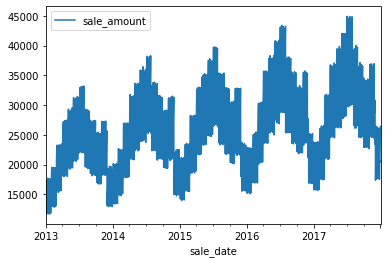

In [26]:
# Now take a look at the data:
by_date.plot(x="sale_date", y="sale_amount")

#### ^^ Shows seasonality - looks like there's more business during the Summer months, with a peak somewhere between Thanksgiving and Christmas.

### Plot Target Variable over Time

- Target is what we wish to predict / forecast.  
- aggregate "sale_amount" by the "sale_date" using '.sum()'

In [27]:
# Number of unique stores that had any sales during this timeframe

df.store_id.nunique()

10

**Ten (10) individual stores had sales during this timeframe.**

In [28]:
# Next, get the number of observations (item transactions) per store:

df.store_id.value_counts()

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store_id, dtype: int64

**Looks like each store is selling 91,300 items during this timeframe.  Nice.**

In [29]:
# Recall that each row is a transaction of a specific item_name / item_id:
df[df.store_id == 1].head(3)

# "Get the dataframe and show me what happened at store location 1"

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,37.0,219121,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Garnier Nutritioniste,13,Garnier Nutritioniste Moisture Rescue Fresh Cl...,6.47,603084234561,603084234561
2013-01-01 00:00:00+00:00,22.0,237381,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Pamprin,14,Pamprin Maximum Strength Multi-symptom Menstru...,7.54,41167300121,41167300121


**^^ Shows the transactions that happened at Store 1**

In [30]:
# Show me the number of unique items sold across all of the stores on all of the dates:

df.item_name.nunique()

50

In [31]:
# Now show the quantity of items sold across all stores and dates.

df.item_name.value_counts().describe()

# "Count the values in the item_name column, and give me a description of what you find."

count       50.0
mean     18260.0
std          0.0
min      18260.0
25%      18260.0
50%      18260.0
75%      18260.0
max      18260.0
Name: item_name, dtype: float64

#### ^^ Shows me there were 50 unique items.  Each item underwent 18,260 transactions.

In [32]:
df.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


In [33]:
df.shape

(913000, 13)

#### ^^ Remember that 913,000 rows == 913,000 individual transactions of the item ('item_name') at a given store ('store_id').  So to recap the above, there are 50 unique items.  Each of the 50 unique items was sold 18,260 times.

### Next steps:

- reset the index so that 'sale_date' becomes a feature.  As a feature, we can do stuff with it, like '.sum', '.mean', etc

- then group by 'store_id' and 'item_id' to show which stores had which items

- finally, perform the necessary aggregates to answer the questions

In [34]:
first_sale_per_storeitem = df.reset_index().groupby(["store_id", "item_id"]).sale_date.min()

# "On the df, reset the index from 'sale_date' back to its original (0, 1, 2, 3, 4...) and show me which stores
# sole which items by grouping 'store_id' and 'item_id'.  Organize what you give back to me by the earliest (min) 
# 'sale_date'

first_sale_per_storeitem

store_id  item_id
1         1         2013-01-01 00:00:00+00:00
          2         2013-01-01 00:00:00+00:00
          3         2013-01-01 00:00:00+00:00
          4         2013-01-01 00:00:00+00:00
          5         2013-01-01 00:00:00+00:00
                               ...           
10        46        2013-01-01 00:00:00+00:00
          47        2013-01-01 00:00:00+00:00
          48        2013-01-01 00:00:00+00:00
          49        2013-01-01 00:00:00+00:00
          50        2013-01-01 00:00:00+00:00
Name: sale_date, Length: 500, dtype: datetime64[ns, UTC]

#### ^^ Truncated, but tells us Store 1's first sale of item 1 was Jan 1st, 2013.  Same for all the other items at all the other stores.  Or is it?  To check if Jan 1, 2013 is the first date for all store / item combos, get the unique dates from the first_sale_per_store_item variable above.  It will return an array - if there's only one value, then yes, Jan 1, 2013 was is the first date in all the store / item combos.

In [35]:
first_sale_per_storeitem.unique()

<DatetimeArray>
['2013-01-01 00:00:00+00:00']
Length: 1, dtype: datetime64[ns, UTC]

**Yup.  Jan 1, 2013 was kickoff day for all items at all stores**

In [36]:
# To find the most recent transactions (.max) for each store / item combo:
last_sale_per_storeitem = df.reset_index().groupby(["store_id", "item_id"]).sale_date.max()

# "On the df, reset the index from 'sale_date' back to its original (0, 1, 2, 3, 4...) and show me which stores
# sold which items by grouping 'store_id' and 'item_id'.  Organize what you give back to me by the latest (max) 
# 'sale_date'

last_sale_per_storeitem[0:5] # show me the first five rows

store_id  item_id
1         1         2017-12-31 00:00:00+00:00
          2         2017-12-31 00:00:00+00:00
          3         2017-12-31 00:00:00+00:00
          4         2017-12-31 00:00:00+00:00
          5         2017-12-31 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, UTC]

**Same as above: is Dec 31, 2017 the last date of sale for all store / item combos?**

In [37]:
last_sale_per_storeitem.unique()

<DatetimeArray>
['2017-12-31 00:00:00+00:00']
Length: 1, dtype: datetime64[ns, UTC]

**One array is returned.  Yup.  Last recorded sale of any item from any store**

In [38]:
# To find on how many different days each item sold at each store:

days_per_storeitem = df.reset_index().groupby(["store_id", "item_id"]).sale_date.nunique()

#"On the df, reset the index from 'sale_date' back to its original (0, 1, 2, 3, 4...) and show me which stores
# sold which items by grouping 'store_id' and 'item_id'.  Using '.nunique()', show me a count of how many times
# each item was sold at each store."

days_per_storeitem[0:5] # "Just give me the first 5 rows"

store_id  item_id
1         1          1826
          2          1826
          3          1826
          4          1826
          5          1826
Name: sale_date, dtype: int64

**Each of the first 5 items from Store 1 sold 1,826 times.  But did each item at each store sell that many times?**

In [39]:
days_per_storeitem.unique()

array([1826])

**A single array came back, meaning there's only one unique number in all 'store_id' / 'item_id' combinations**

In [40]:
# Quantity of items sold per day overall, NOT brokend down by 'store_id'

df.groupby("sale_date").sale_amount.sum().head() 

# "Bunch all the data from 'sale_date' column and sum the number of sales ('sale_amount')on each date."

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-03 00:00:00+00:00    14488.0
2013-01-04 00:00:00+00:00    15677.0
2013-01-05 00:00:00+00:00    16237.0
Name: sale_amount, dtype: float64

### Resampling:

- Lets us redefine the frequency of our data - gives us more datapoints

- Doing so changes the time-window of our focus

- Two types of resampling:

    1.) Downsampling; and
    
    2.) Upsampling

#### Downsampling:

- redefines our data to give us more datapoints

- since we're pulling datapoints out of thin air, there will be loads of Nan values

- For example: if our original data is in days, we would downsample to see hours, minutes, seconds, etc
    
- We would do this to merge less granular data ("what happened in 2016") with more granular data ("what happened on July 10, 2016")

- B/c we'll have more NaNs, we'll need to deal with them, usually with '.ffill' or '.bfill':
    
    1.) '.ffill' - moves the previous observation forward; fills na's with the corresponding value on the previous row
    
    2.) '.bfill' - fills na's with the corresponding column value on the next row

In [41]:
# Downsampling example:

downsampling_example = df.groupby("sale_date").sale_amount.sum().asfreq("12H")

# "Give me the sum of the sales by date ('sale_date') that happen every 12 hours"

downsampling_example.head(5)

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-01 12:00:00+00:00        NaN
2013-01-02 00:00:00+00:00    13678.0
2013-01-02 12:00:00+00:00        NaN
2013-01-03 00:00:00+00:00    14488.0
Freq: 12H, Name: sale_amount, dtype: float64

In [42]:
# using '.ffill()' to take care of NaN's:

downsampling_example.ffill().head()

# See how it takes the previous value and places it into the NaN value from above?

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-01 12:00:00+00:00    13696.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-02 12:00:00+00:00    13678.0
2013-01-03 00:00:00+00:00    14488.0
Freq: 12H, Name: sale_amount, dtype: float64

In [43]:
# using '.bfill()' to take care of NaN's:

downsampling_example.bfill().head()

# Notice how BFILL fills in the NaN with the NEXT value

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-01 12:00:00+00:00    13678.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-02 12:00:00+00:00    14488.0
2013-01-03 00:00:00+00:00    14488.0
Freq: 12H, Name: sale_amount, dtype: float64

#### For the store data, '.ffill( )' seems like a better option because we've split the data into 12-hour (half-day) chuncks.  By forward-filling, we can explain it as "well, those NaNs were the hours we were closed.  We're only open from 12 hours a day."  If we filled NaN's using '.bfill( )', it would seem like more of a prediction - we don't know what the next day's sales are gonna look like.

### Unsampling:

- means to create fewer datapoints

- we lose granulatity.  For instance our annual data is by single day, but instead of a bunch of jagged lines, we want to see more spread out data; intead of what happened each day, we want to see what happened each week (takes our number of datapoints down from 365 to 52)

- it is **CRITICAL** we use the '.resample' function when usampling.  If you don't use '.resample', you LOSE DATA.

In [44]:
# When we ".resample()" by the week, we provide an aggregate function to aggreagate all of the granular data.

# ".resample()" applies the aggregate function to all the datapoints in teh time frame to give us the right answer:

df.sale_amount.resample("W").sum().head()

# "Resample the 'sale_amount' from days into weeks ("W"), then add them together 
# and give me the first five rows of data"

sale_date
2013-01-06 00:00:00+00:00     91067.0
2013-01-13 00:00:00+00:00    103902.0
2013-01-20 00:00:00+00:00    102950.0
2013-01-27 00:00:00+00:00    103298.0
2013-02-03 00:00:00+00:00    109027.0
Freq: W-SUN, Name: sale_amount, dtype: float64

**^^ Note how the 'sale_date' is weekly**

In [45]:
# To show the total sales of the month, upsample by month ("M") and aggregate by '.sum()'

df.sale_amount.resample("M").sum().head()

sale_date
2013-01-31 00:00:00+00:00    454904.0
2013-02-28 00:00:00+00:00    459417.0
2013-03-31 00:00:00+00:00    617382.0
2013-04-30 00:00:00+00:00    682274.0
2013-05-31 00:00:00+00:00    763242.0
Freq: M, Name: sale_amount, dtype: float64

**^^ Now note how the 'sale_amount' is monthly**

In [46]:
# You can get even more specific.  To show the rows for the Summer months of 2015, 
# groupby 'store_id', unsample by month ("M"), and aggregate by count 
# to produce the number of rows per month:

df.loc["2015-06" : "2015-08"].groupby("store_id").sale_amount.resample("M").count().head()

# "At locations matching the 6th through the 8th months of 2016, group the data by "store_id," and show me the 
# monthly sales amount for each of the three months

store_id  sale_date                
1         2015-06-30 00:00:00+00:00    1500
          2015-07-31 00:00:00+00:00    1550
          2015-08-31 00:00:00+00:00    1550
2         2015-06-30 00:00:00+00:00    1500
          2015-07-31 00:00:00+00:00    1550
Name: sale_amount, dtype: int64

In [47]:
# To show sales by year, we just upsample to "Y":
df.sale_amount.resample("Y").sum()

sale_date
2013-12-31 00:00:00+00:00     7941243.0
2014-12-31 00:00:00+00:00     9135482.0
2015-12-31 00:00:00+00:00     9536887.0
2016-12-31 00:00:00+00:00    10357160.0
2017-12-31 00:00:00+00:00    10733740.0
Freq: A-DEC, Name: sale_amount, dtype: float64

**^^ Note 'sale_date' is the year**

#### Date Frequency Strings:

- MANNNNNY more resampling options available besides "H", "D", "M", "Y" - check Pandas docs

### Checking for time gaps in data:

- nulls don't detect gaps in time

- check the number of rows against the number of timedeltas that may exist between the datetime min and datetime max

- this check will let us know if there are any gaps in the time data we need to handle

- **df.index.max() - df.index.min() + 1 unit of the observation** is how you count timedeltas

In [48]:
print(f"Number of rows: {df.index.nunique()}")
print(f"Number of timedeltas of a day: {df.index.max() - df.index.min() + timedelta(days=1)}")

Number of rows: 1826
Number of timedeltas of a day: 1826 days 00:00:00


**^^ No timedeltas in our data, so no gaps.** 

### Handling Nulls

- Nulls could be coming from new rows being written willy nilly and not according to specific periods

- Updates mean old data recorded over different time periods than new data (eg: used to be weekly, now data is daily)

- Downsampling (remember: just adding datapoints without real data behind them)

In [49]:
# Say we downsample from daily data to 12-hour freqeuncies:

nan_example = df.groupby("sale_date").sum().asfreq("12H")[["sale_amount"]]

# "Show me the "sale_amount" from every 12-hour period of all the "sale_date(s)"

nan_example

,sale_amount
sale_date,
2013-01-01 00:00:00+00:00,13696.0
2013-01-01 12:00:00+00:00,NaN
2013-01-02 00:00:00+00:00,13678.0
2013-01-02 12:00:00+00:00,NaN
2013-01-03 00:00:00+00:00,14488.0
...,...
2017-12-29 00:00:00+00:00,23535.0
2017-12-29 12:00:00+00:00,NaN
2017-12-30 00:00:00+00:00,24988.0


In [50]:
# .ffill()

nan_example["ffill"] = nan_example.sale_amount.ffill()

# "We're gonna add a column to the df called 'ffill', and in it, we want to ffill the nans that were there."

nan_example

,sale_amount,ffill
sale_date,,
2013-01-01 00:00:00+00:00,13696.0,13696.0
2013-01-01 12:00:00+00:00,NaN,13696.0
2013-01-02 00:00:00+00:00,13678.0,13678.0
2013-01-02 12:00:00+00:00,NaN,13678.0
2013-01-03 00:00:00+00:00,14488.0,14488.0
...,...,...
2017-12-29 00:00:00+00:00,23535.0,23535.0
2017-12-29 12:00:00+00:00,NaN,23535.0
2017-12-30 00:00:00+00:00,24988.0,24988.0


In [51]:
# bfill()

nan_example["bfill"] = nan_example.sale_amount.bfill()

nan_example

,sale_amount,ffill,bfill
sale_date,,,
2013-01-01 00:00:00+00:00,13696.0,13696.0,13696.0
2013-01-01 12:00:00+00:00,NaN,13696.0,13678.0
2013-01-02 00:00:00+00:00,13678.0,13678.0,13678.0
2013-01-02 12:00:00+00:00,NaN,13678.0,14488.0
2013-01-03 00:00:00+00:00,14488.0,14488.0,14488.0
...,...,...,...
2017-12-29 00:00:00+00:00,23535.0,23535.0,23535.0
2017-12-29 12:00:00+00:00,NaN,23535.0,24988.0
2017-12-30 00:00:00+00:00,24988.0,24988.0,24988.0


### Rolling Windows

- Allow us to add windows of time

- We can use agg functions to create rolling averages ("moving averages"), rolling counts, rolling min and max, etc.

In [52]:
rolling_example = pd.DataFrame()

rolling_example["daily_average"] = df.loc["2015" : "2016"].groupby("sale_date").sale_amount.mean()

# "We're adding the column 'daily_average' to the rolling_example df.  
# In it, we're putting the average amount of each sale w/in the sales_dates between 2015 and 2016"

rolling_example["30_day_avg"] = rolling_example.daily_average.rolling(30).mean()

rolling_example["90_day_avg"] = rolling_example.daily_average.rolling(90).mean()

In [53]:
rolling_example.head()

,daily_average,30_day_avg,90_day_avg
sale_date,,,
2015-01-01 00:00:00+00:00,34.452,NaN,NaN
2015-01-02 00:00:00+00:00,37.438,NaN,NaN
2015-01-03 00:00:00+00:00,39.596,NaN,NaN
2015-01-04 00:00:00+00:00,42.202,NaN,NaN
2015-01-05 00:00:00+00:00,28.470,NaN,NaN


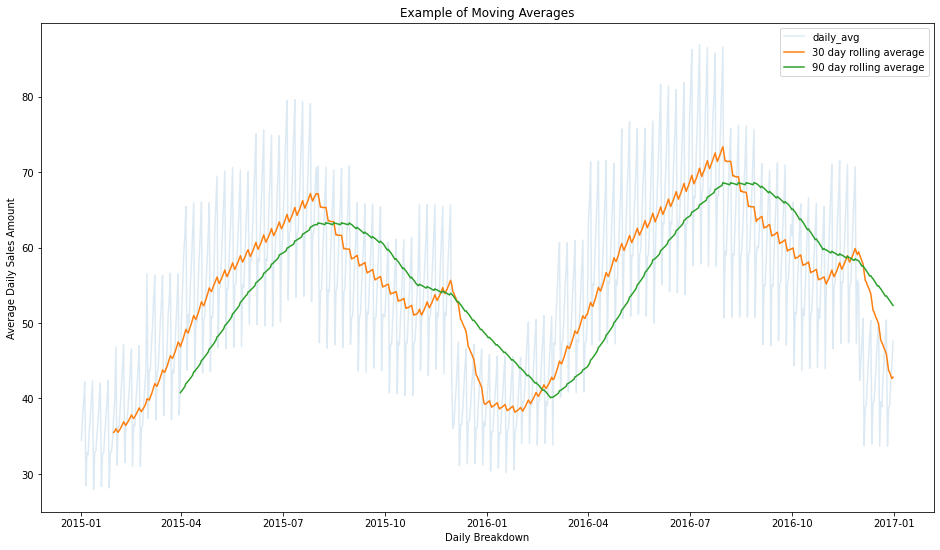

In [54]:
plt.figure(figsize=(16,9))
plt.title("Example of Moving Averages")
plt.xlabel("Daily Breakdown")
plt.ylabel("Average Daily Sales Amount")

# It's useful to lower the alpha / opacity to reduce the noise

plt.plot(rolling_example.index, rolling_example.daily_average, alpha=.15)
plt.plot(rolling_example.index, rolling_example["30_day_avg"])
plt.plot(rolling_example.index, rolling_example["90_day_avg"])

plt.legend(["daily_avg", "30 day rolling average", "90 day rolling average"], loc="upper right")

plt.show()

### Lagging and Lead

- .shift moves the data backward and forward by a given amount

- .diff finds the difference with the previous observation (or a specified further back observation)

In [55]:
df["shift(-1)"] = df.sale_amount.shift(-1)
df["diff(1)"] = df.sale_amount.diff(1)
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,shift(-1),diff(1)
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,26.0,NaN
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,27.0,13.0
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,54.0,1.0
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,35.0,27.0
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,41.0,-19.0


## Faith's Walkthrough

In [56]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

import requests
import os
from datetime import timedelta, datetime as dt

import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data, german_energy_csv

In [57]:
# Get the store data using the acquire function:
df = get_store_data()
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,2013-01-01 00:00:00+00:00,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,2013-01-02 00:00:00+00:00,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,2013-01-03 00:00:00+00:00,3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,2013-01-04 00:00:00+00:00,4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,2013-01-05 00:00:00+00:00,5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [58]:
# take a look at it:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
sale_amount      913000 non-null float64
sale_date        913000 non-null object
sale_id          913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_id         913000 non-null int64
store_state      913000 non-null object
store_zipcode    913000 non-null int64
item_brand       913000 non-null object
item_id          913000 non-null int64
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


**^^ Gotta convert the 'sale_date' column into a DateTime format using 'parse'**

"Parsing" means to convert data from its original format into a more easily usable format.  

In [59]:
df = pd.read_csv("big_df.csv", parse_dates=True, index_col = "sale_date")

In [60]:
df.head()

,Unnamed: 0,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-02 00:00:00+00:00,1,11.0,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-03 00:00:00+00:00,2,14.0,3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-04 00:00:00+00:00,3,13.0,4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-05 00:00:00+00:00,4,10.0,5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 14 columns):
Unnamed: 0       913000 non-null int64
sale_amount      913000 non-null float64
sale_id          913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_id         913000 non-null int64
store_state      913000 non-null object
store_zipcode    913000 non-null int64
item_brand       913000 non-null object
item_id          913000 non-null int64
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 104.5+ MB


In [62]:
df.item_price.describe()

count    913000.000000
mean          5.160400
std           2.737764
min           0.600000
25%           2.970000
50%           5.195000
75%           7.520000
max           9.640000
Name: item_price, dtype: float64

In [63]:
df.index.min()

# shows the first 'sale_date'

Timestamp('2013-01-01 00:00:00+0000', tz='UTC')

In [64]:
print(df.index)

DatetimeIndex(['2013-01-01 00:00:00+00:00', '2013-01-02 00:00:00+00:00',
               '2013-01-03 00:00:00+00:00', '2013-01-04 00:00:00+00:00',
               '2013-01-05 00:00:00+00:00', '2013-01-06 00:00:00+00:00',
               '2013-01-07 00:00:00+00:00', '2013-01-08 00:00:00+00:00',
               '2013-01-09 00:00:00+00:00', '2013-01-10 00:00:00+00:00',
               ...
               '2017-12-22 00:00:00+00:00', '2017-12-23 00:00:00+00:00',
               '2017-12-24 00:00:00+00:00', '2017-12-25 00:00:00+00:00',
               '2017-12-26 00:00:00+00:00', '2017-12-27 00:00:00+00:00',
               '2017-12-28 00:00:00+00:00', '2017-12-29 00:00:00+00:00',
               '2017-12-30 00:00:00+00:00', '2017-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='sale_date', length=913000, freq=None)
